In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [32]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.8__.8_.8_.95_1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.8__.8_.8_.95_1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 9 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [33]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 9

nref = 2

p_refs = (/ 1, 500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5, 4 /)

data wgt
     &     /1, .95, .8, .8,
     &     5*.8/

planck_wgt_flux = 2

option_wgt = 1

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

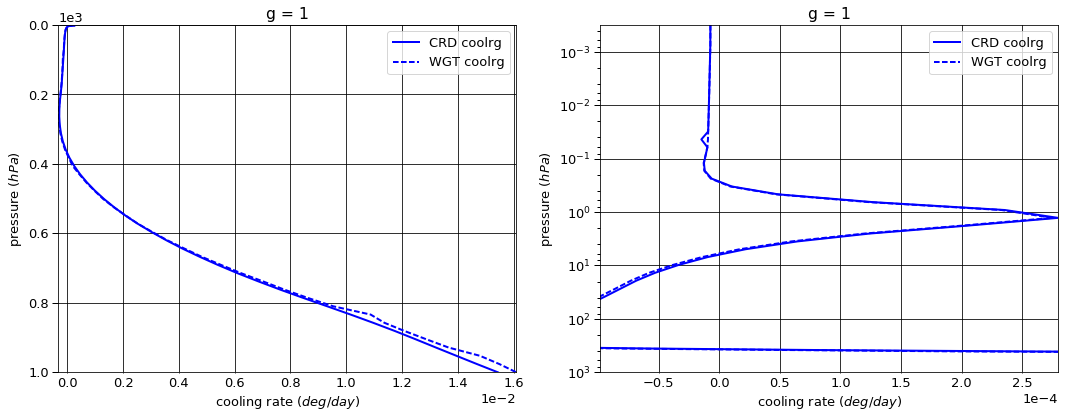

# Figure: cooling rate g-group 2

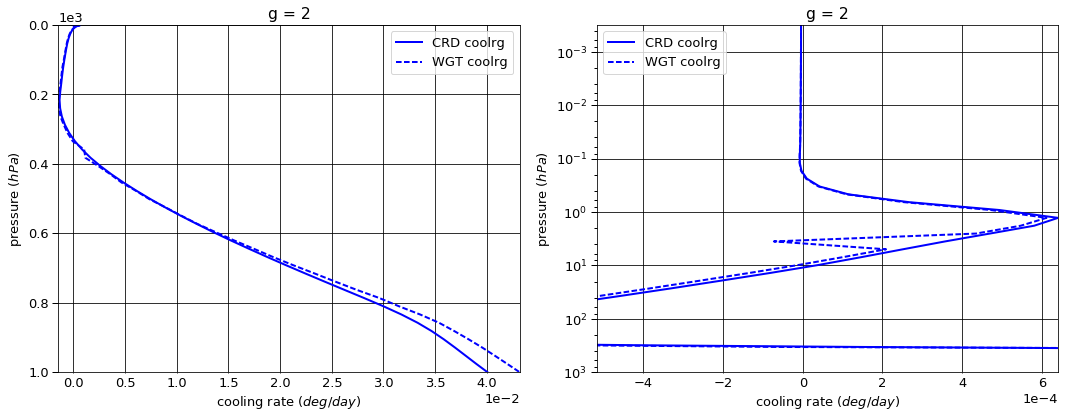

# Figure: cooling rate g-group 3

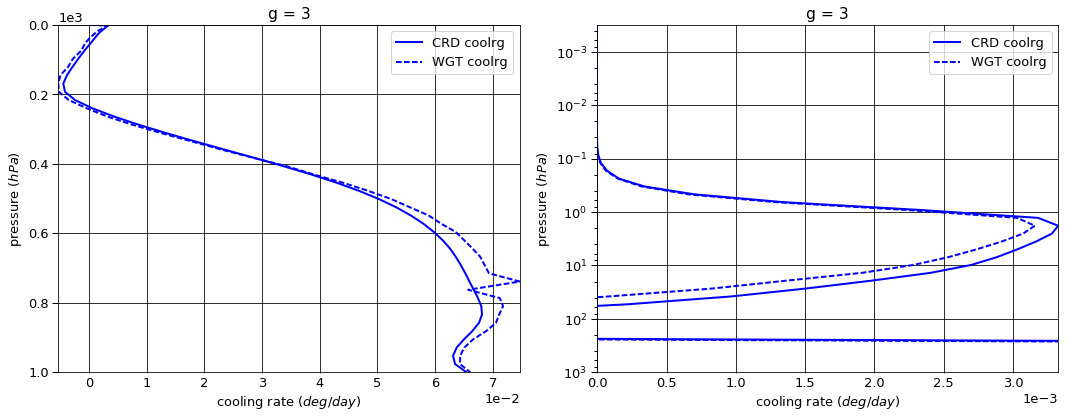

# Figure: cooling rate g-group 4

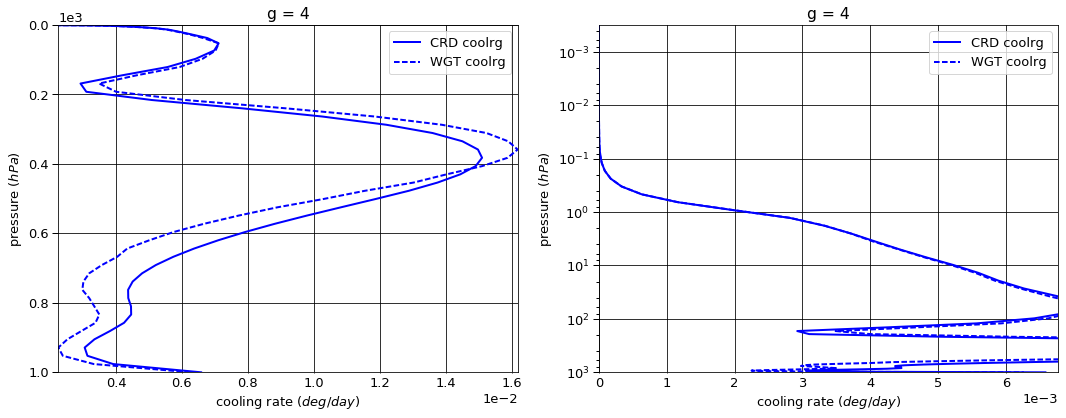

# Figure: cooling rate g-group 5

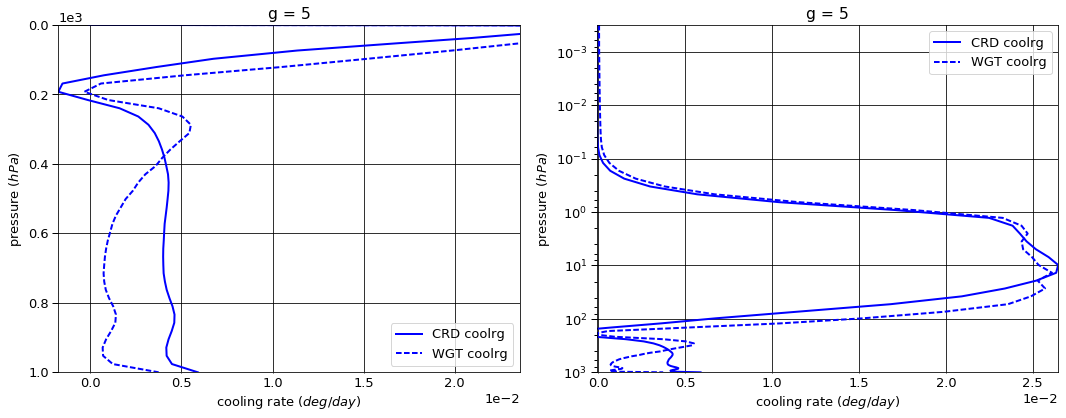

# Figure: cooling rate g-group 6

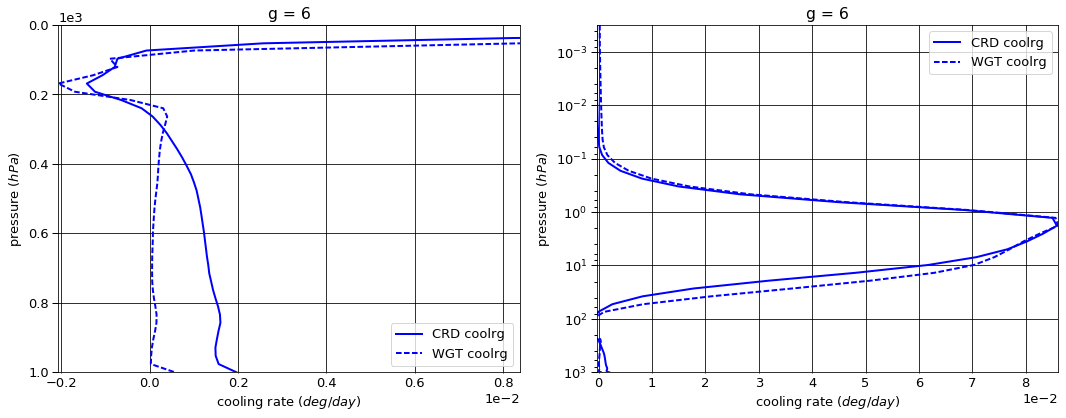

# Figure: cooling rate g-group 7

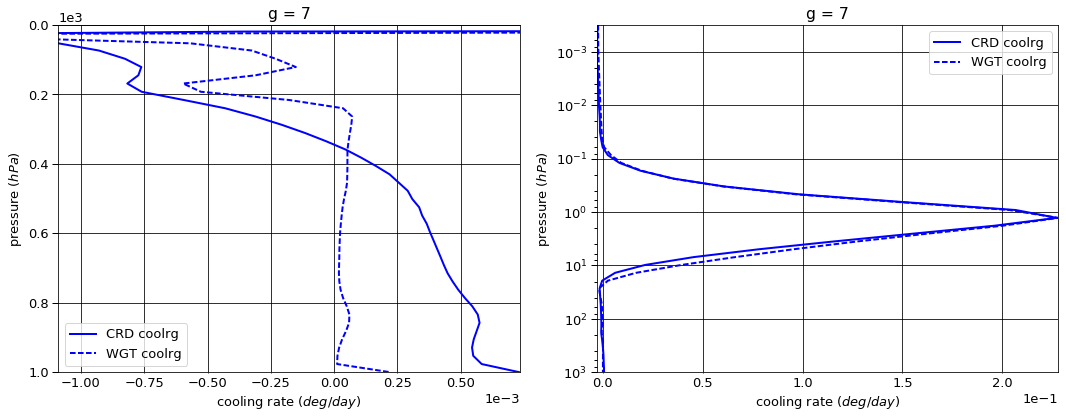

# Figure: cooling rate g-group 8

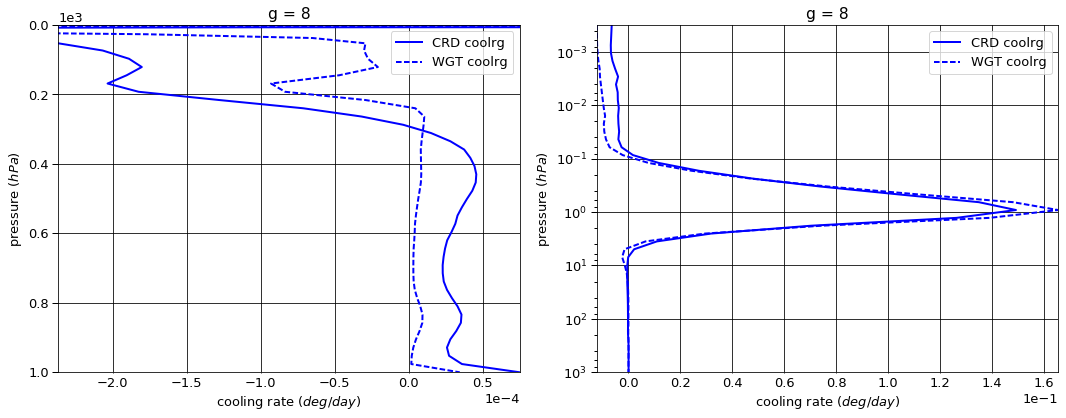

# Figure: cooling rate g-group 9

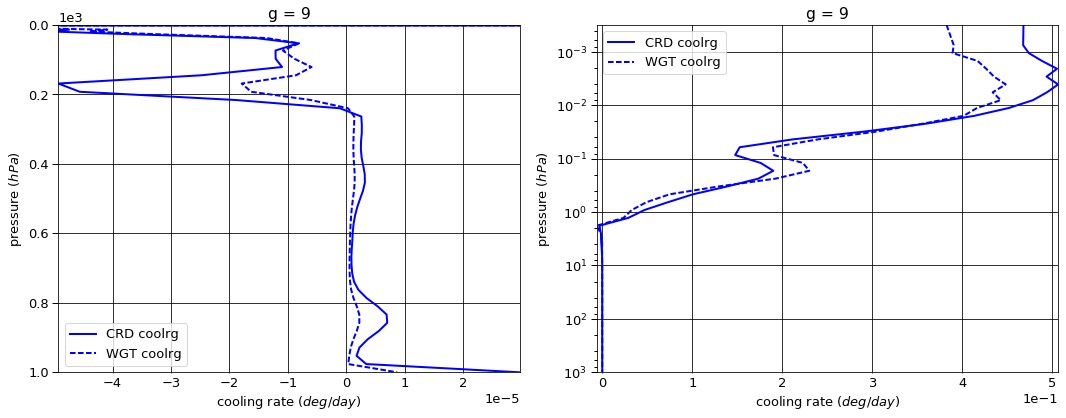

# Figure: cooling rate g-group total

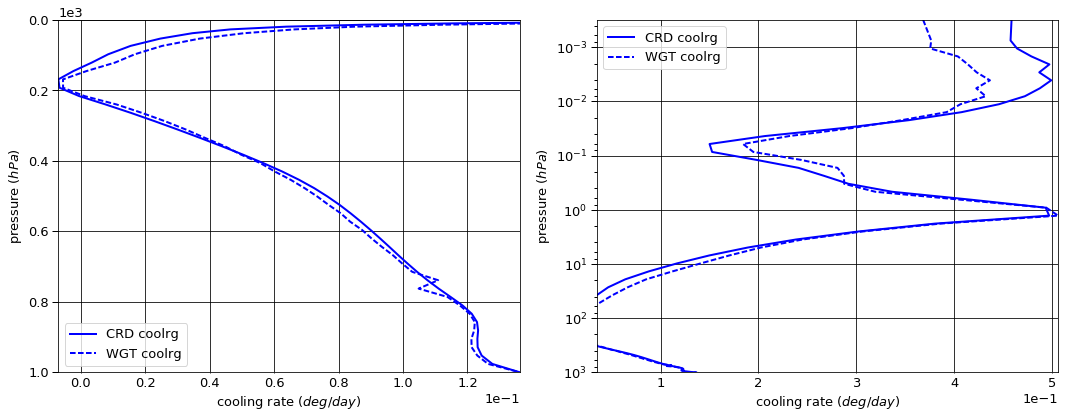

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -11.555476  0.000000 -11.555476
  1013.0   76    -11.683781  0.605187 -11.078594
2 0.0      1      -6.000030  0.000000  -6.000030
  1013.0   76     -6.568332  2.122303  -4.446029
3 0.0      1      -6.128369  0.000000  -6.128369
  1013.0   76     -9.197329  7.653060  -1.544269
4 0.0      1      -0.949315  0.000000  -0.949315
  1013.0   76     -2.350757  2.312324  -0.038433
5 0.0      1      -0.828028  0.000000  -0.828028
  1013.0   76     -1.799301  1.560883  -0.238418
6 0.0      1      -0.337781  0.000000  -0.337781
  1013.0   76     -0.704314  0.635430  -0.068883
7 0.0      1      -0.139145  0.000000  -0.139145
  1013.0   76     -0.254070  0.234346  -0.019724
8 0.0      1      -0.026270  0.000000  -0.026270
  1013.0   76     -0.041719  0.041235  -0.000484
9 0.0      1      -0.014466  0.000000  -0.014466
  1013.0   76     -0.037941  0.037847  -0.000094


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -11.552063  0.000000 -11.552063
  1013.0   76    -11.683781  0.623789 -11.059992
2 0.0      1      -5.983083  0.000000  -5.983083
  1013.0   76     -6.568332  2.213106  -4.355226
3 0.0      1      -6.004441  0.000000  -6.004441
  1013.0   76     -9.197329  7.928907  -1.268422
4 0.0      1      -0.887692  0.000000  -0.887692
  1013.0   76     -2.350757  2.319450  -0.031307
5 0.0      1      -0.540286  0.000000  -0.540286
  1013.0   76     -1.799301  1.784893  -0.014407
6 0.0      1      -0.258064  0.000000  -0.258064
  1013.0   76     -0.704314  0.702709  -0.001605
7 0.0      1      -0.130963  0.000000  -0.130963
  1013.0   76     -0.254070  0.253441  -0.000630
8 0.0      1      -0.027005  0.000000  -0.027005
  1013.0   76     -0.041719  0.041622  -0.000097
9 0.0      1      -0.013382  0.000000  -0.013382
  1013.0   76     -0.037941  0.037917  -0.000024


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.003413  0.000000  0.003413
  1013.0   76     0.000000  0.018602  0.018602
2 0.0      1      0.016947  0.000000  0.016947
  1013.0   76     0.000000  0.090803  0.090803
3 0.0      1      0.123928  0.000000  0.123928
  1013.0   76     0.000000  0.275846  0.275846
4 0.0      1      0.061624  0.000000  0.061624
  1013.0   76     0.000000  0.007126  0.007126
5 0.0      1      0.287742  0.000000  0.287742
  1013.0   76     0.000000  0.224011  0.224011
6 0.0      1      0.079718  0.000000  0.079718
  1013.0   76     0.000000  0.067278  0.067278
7 0.0      1      0.008182  0.000000  0.008182
  1013.0   76     0.000000  0.019094  0.019094
8 0.0      1     -0.000735  0.000000 -0.000735
  1013.0   76     0.000000  0.000388  0.000388
9 0.0      1      0.001084  0.000000  0.001084
  1013.0   76     0.000000  0.000069  0.000069

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -7.275763e-06
  1001.112500 75     1.543598e-02
2 0.000312    1     -4.252639e-06
  1001.112500 75     4.007637e-02
3 0.000312    1     -4.131801e-06
  1001.112500 75     6.547782e-02
4 0.000312    1      4.112522e-07
  1001.112500 75     6.581821e-03
5 0.000312    1     -7.620625e-05
  1001.112500 75     5.898426e-03
6 0.000312    1     -3.815049e-04
  1001.112500 75     1.966134e-03
7 0.000312    1     -2.631795e-03
  1001.112500 75     7.332791e-04
8 0.000312    1     -6.459005e-03
  1001.112500 75     7.515299e-05
9 0.000312    1      4.681046e-01
  1001.112500 75     2.967633e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1     -7.228259e-06
  1001.112500 75     1.609620e-02
2 0.000312    1     -4.355417e-06
  1001.112500 75     4.319135e-02
3 0.000312    1     -4.795996e-06
  1001.112500 75     6.613565e-02
4 0.000312    1      5.825289e-07
  1001.112500 75     6.264783e-03
5 0.000312    1      6.181497e-05
  1001.112500 75     3.747157e-03
6 0.000312    1      2.045434e-04
  1001.112500 75     5.732888e-04
7 0.000312    1     -2.387480e-03
  1001.112500 75     2.237393e-04
8 0.000312    1     -1.226189e-02
  1001.112500 75     3.454670e-05
9 0.000312    1      3.826155e-01
  1001.112500 75     8.694033e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      4.750420e-08
  1001.112500 75     6.602250e-04
2 0.000312    1     -1.027778e-07
  1001.112500 75     3.114985e-03
3 0.000312    1     -6.641948e-07
  1001.112500 75     6.578340e-04
4 0.000312    1      1.712768e-07
  1001.112500 75    -3.170377e-04
5 0.000312    1      1.380212e-04
  1001.112500 75    -2.151269e-03
6 0.000312    1      5.860483e-04
  1001.112500 75    -1.392846e-03
7 0.000312    1      2.443144e-04
  1001.112500 75    -5.095398e-04
8 0.000312    1     -5.802887e-03
  1001.112500 75    -4.060630e-05
9 0.000312    1     -8.548918e-02
  1001.112500 75    -2.098229e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978879,0.000000,-25.978879
1013.0,76,-32.637543,15.202617,-17.434927



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.396977,0.000000,-25.396977
1013.0,76,-32.637543,15.905834,-16.731710



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.581902,0.000000,0.581902
1013.0,76,0.000000,0.703217,0.703217


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,0.368217
1001.112500,75,0.136275



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-9.032423e-02
1001.112500,75,7.636806e-07


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.366438,0.351597
2,0.202187,0.200384
3,0.276062,0.286209
4,0.070187,0.073457
5,0.054062,0.055958
6,0.021063,0.021991
7,0.007625,0.007912
8,0.001250,0.001300
9,0.001125,0.001193


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,6.375563e-24
3,5.546576e-23
4,4.825379e-22
5,1.082530e-23
6,1.249024e-22
7,1.441124e-21
8,1.662770e-20
9,1.918505e-19


In [23]:
def spreadsheet():
    ng = 9
    ng_refs = [5, 4]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.366438,0.351597,0.366438,0.351597,500.0
2,6.375563e-24,21.545920,0.202187,0.200384,0.568625,0.551980,500.0
3,5.546576e-23,8.699743,0.276062,0.286209,0.844688,0.838190,500.0
4,4.825379e-22,8.699743,0.070187,0.073457,0.914875,0.911646,500.0
5,1.082530e-23,0.022434,0.054062,0.055958,0.968938,0.967604,1.0
6,1.249024e-22,11.538005,0.021063,0.021991,0.990000,0.989595,1.0
7,1.441124e-21,11.538006,0.007625,0.007912,0.997625,0.997507,1.0
8,1.662770e-20,11.538006,0.001250,0.001300,0.998875,0.998807,1.0
9,1.918505e-19,11.538006,0.001125,0.001193,1.000000,1.000000,1.0


In [25]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [26]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [27]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')